In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
ticker = 'TSLA'

In [2]:
df = web.DataReader(ticker, data_source='yahoo', start='2012-01-01', end='2020-10-26')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,5.900000,5.530000,5.788000,5.616000,4640500.0,5.616000
2012-01-04,5.734000,5.500000,5.642000,5.542000,3150500.0,5.542000
2012-01-05,5.586000,5.370000,5.552000,5.424000,5027500.0,5.424000
2012-01-06,5.558000,5.282000,5.440000,5.382000,4931500.0,5.382000
2012-01-09,5.498000,5.224000,5.400000,5.450000,4485000.0,5.450000
...,...,...,...,...,...,...
2020-10-20,431.750000,419.049988,431.750000,421.940002,31656300.0,421.940002
2020-10-21,432.950012,421.250000,422.700012,422.640015,32370500.0,422.640015
2020-10-22,445.230011,424.510010,441.920013,425.790009,39993200.0,425.790009


In [3]:
df.shape

(2219, 6)

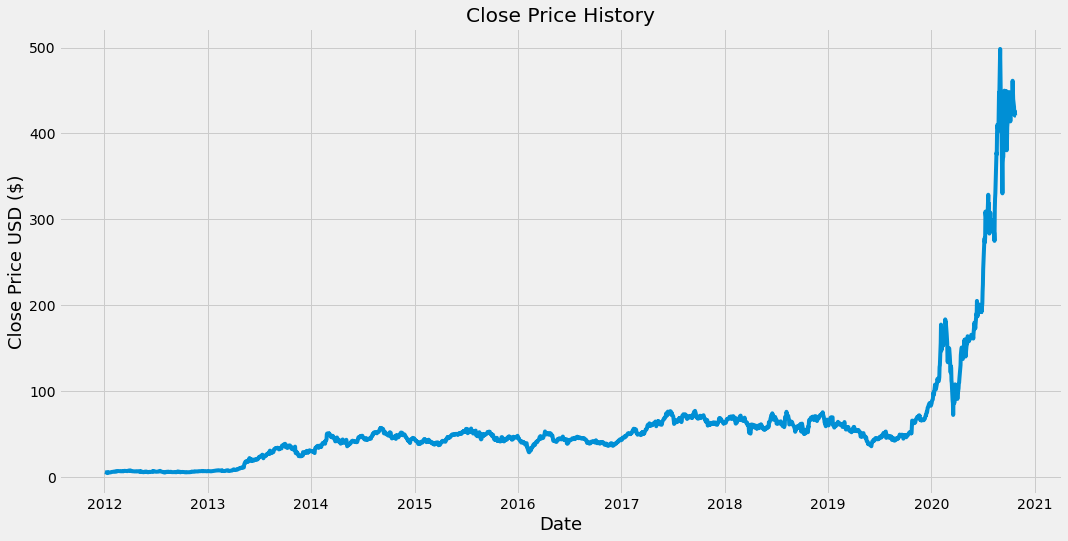

In [4]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [5]:
# Create new dataframe with only the 'Close column'

In [6]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset) * .90)

training_data_len

1998

In [7]:
# Scale the data

In [8]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data


array([[0.00214273],
       [0.00199286],
       [0.00175388],
       ...,
       [0.85310737],
       [0.84265699],
       [0.84194813]])

In [9]:
# Create the training data set

In [10]:
train_data = scaled_data[0:training_data_len, :]

# Split the data into x_train and y_train data sets

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 60:
        print(x_train)
        print(y_train)
        print()
    

[array([0.00214273, 0.00199286, 0.00175388, 0.00166882, 0.00180654,
       0.00195641, 0.00220349, 0.00221159, 0.        , 0.00154325,
       0.00162831, 0.00160806, 0.00154325, 0.00161211, 0.0018754 ,
       0.00209818, 0.00249108, 0.00264905, 0.00274626, 0.00254374,
       0.00275031, 0.0030217 , 0.00338625, 0.00364953, 0.00356852,
       0.00370219, 0.00396547, 0.00336599, 0.00352396, 0.00420445,
       0.00437863, 0.00461356, 0.00493355, 0.00474318, 0.00462976,
       0.00475533, 0.00443939, 0.00438673, 0.00446369, 0.00430167,
       0.00470672, 0.00455685, 0.00444749, 0.00418015, 0.0041842 ,
       0.00416395, 0.00484039, 0.00535481, 0.00538721, 0.00506317,
       0.0049457 , 0.00507532, 0.0049376 , 0.0049295 , 0.00500646,
       0.00470267, 0.00457305, 0.00591783, 0.00613656, 0.0061001 ])]
[0.005889477014738919]



In [11]:
# Convert x_train and y_train to numpy arrays

In [12]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [13]:
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1938, 60, 1)

In [14]:
# Build LSTM model
model = Sequential()

In [15]:
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [16]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [17]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1938/1938 [==============================] - 131s 68ms/step - loss: 8.5993e-05


In [18]:
# Create the testing data set
#Create new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60:, :]
# Create the data set x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])


In [19]:
# Convert the data to numpy array
x_test = np.array(x_test)

In [20]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [21]:
# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


In [22]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt( np.mean( predictions - y_test)**2)
rmse

29.203115333798785

/export/home/avani/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


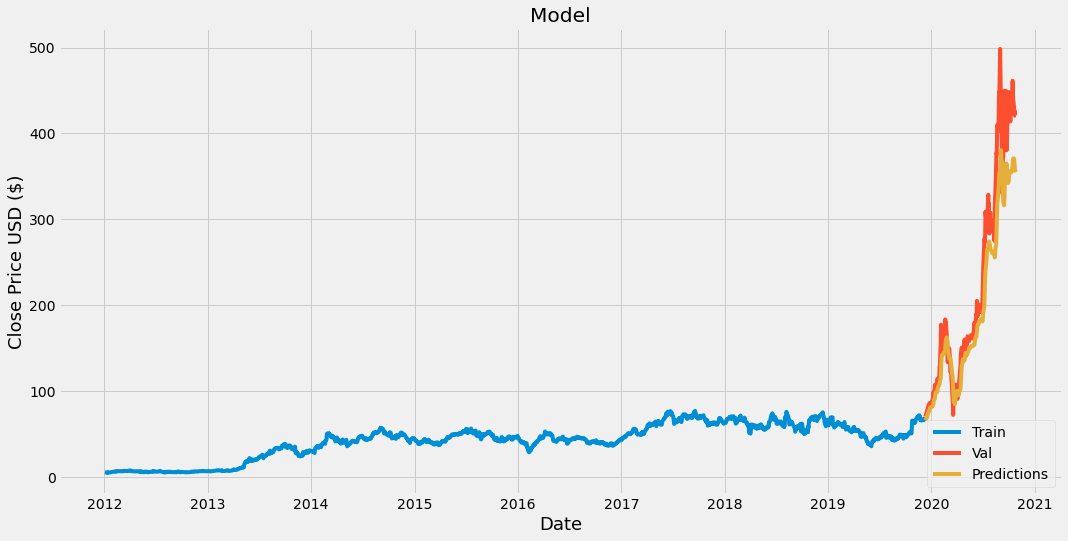

In [23]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visual
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()



In [24]:
# Show the valid and redicted prices
valid

,Close,Predictions
Date,,
2019-12-11,70.540001,66.102013
2019-12-12,71.935997,66.873100
2019-12-13,71.678001,67.805466
2019-12-16,76.300003,68.583382
2019-12-17,75.797997,69.945114
...,...,...
2020-10-20,421.940002,367.957397
2020-10-21,422.640015,363.570679
2020-10-22,425.790009,359.624603


In [25]:
# Get the quote
apple_quote = web.DataReader(ticker, data_source='yahoo', start='2012-01-01', end='2020-10-27')

# Create a new dataframe
new_df = apple_quote.filter(['Close'])

# Get the last 60 day closing price values and convert the dataframe to an array
last_90_days = new_df[-60:].values

# Scale data to be values between 0 and 1
last_90_days_scaled = scaler.transform(last_90_days)

# Create empty list
X_test = []

# Append the past 60 days
X_test.append(last_90_days_scaled)

# Convert X_test data set to a numpy array
X_test = np.array(X_test)

# Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Get predicted scaled price
pred_price = model.predict(X_test)

# Undo scaling
pred_price = scaler.inverse_transform(pred_price)

print(pred_price)

[[353.1212]]


In [26]:
# Get the quote
quote2 = web.DataReader(ticker, data_source='yahoo', start='2020-10-26', end='2020-10-26')
print(quote2['Close'])

Date
2020-10-26    420.279999
Name: Close, dtype: float64
